# Adaptive Intelligence COM3240
# Lab 5: Semi-supervised Learning

## Learning Outcomes
- Understand the concept of semi-supervised learning.
- Gain some experience on unsupervised and semi-supervised K-Means clustering.

# Lecture Overview
## Notations
- Assume a dataset $X$ given by a $n$-by-$p$ matrix, where $n$ is the number of observations and $p$ is the number of dimensions (also known as variables or features).
- $\vec{x}_i = [ x_{i1}, x_{i2},\dots, x_{ip} ]$ specifies the $i$-th element of the dataset
- Given $K$ number of partitions (clusters) $C = \{c_1, c_2, \dots, c_K\}$ with $n_1, n_2, \dots, n_k$ number of elements in each group respectively then $\vec{m}_k = [ m_{i1}, m_{i2},\dots, m_{ip} ]$ specifies the centroid of the $k$-th cluster.

## K-Means Clustering
- **Clustering**: given a set of datapoints we want to group them based on their similarity. Each one of these groups is called a *cluster*
- In K-Means clustering, the task is to separate our data into $K$ clusters. However, specifying the number of clusters is a common problem in machine learning and there are various different methods for finding the optimal $K$.
- The objective of K-Means  clustering is the minimisation of the *Within-Cluster-Sum-of-Sqaures* (WCSS). This is defined mathematically as 
$$ E_\mathrm{kmeans} = \sum_{k=1}^{K} \sum_{i \in c_k}^{n_k} \left( \vec{x}_{i} - \vec{m}_{k}\right)^2. $$
- The algorithm for K-Means is as follows:

<img src='./kmeans.png' width=500>

- There are many variations of the K-Means clustering and the one we have described here is called **Lloyd's K-Means**. This is the defaults K-means algorithm in [MATLAB](https://uk.mathworks.com/help/stats/kmeans.html) and [Python](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Another variation is Hartigan-Wong's K-Means clustering which is the default algorithm in [R](https://stat.ethz.ch/R-manual/R-patched/library/stats/html/kmeans.html).

## Centroids Initialisation
- K-Means clustering is sensitive to the initial centroid locations and in many situations, e.g. when they are randomly generated, multiple initial positions are checked. The clustering with the best performance is the adopted. The performance of K-Means can be checked either based on the WCSS (which should be minimised) or some other metric (also known as an index). [Clustering indices](https://cran.r-project.org/web/packages/clusterCrit/vignettes/clusterCrit.pdf) contains a list of such metrics which could be used for cluster tuning, such as also identifying a value for the parameter $k$.
- The most well-known initialisation method is **K-Means++**, which is the default for MATLAB and Python. K-Means++ performs a biased random selection of datapoints as the initial centroids with a the probability that depends on the minimum distance of the datapoint to the currently selected centroids.
- A comparative study of different initialisation methods for K-Means clustering can be found in the work of [Celebi, M. E. et al.](https://arxiv.org/abs/1209.1960)

## Semi-Supervised Learning

### Pairwise Constrained K-Means Clustering (PCK-Means)
Let us assume a situation in which we have partial labelling of our data, i.e only a small part of our dataset is labelled. For example, in the picture below we have a 2-D dataset in which the coloured squares are our initial centroids and the coloured highlighted circles some elements for which we know which class they belong to.
<img src='./SSc.png' width=300>
Given this prior knowledge about our data we can use the labels to infer *contraints*. In general, we have two types of constraints:
- *MUST-LINK* constraints for the elements that should be grouped together in the same cluster because they have the same label.
- *CANNOT-LINK* constraints for the elements that should not be grouped together because they have different labels.

Using this concept, we can incorporate constraints in the K-Means objective function. Since we want to find the closest centroid of each element, we want the distance between each element and its closest centroid to be smaller or larger depending on the constraint violation. Mathematically:

$$ 
E_\text{pckm} = \sum_{k=1}^{K}  \sum_{i \in c_k}^{n_k} \left( (\vec{x}_{i}-\vec{m}_{k})^2
  + \sum_{i' \in ML(i)} (\vec{x}_{i}-\vec{x}_{i'})^2  (1-\delta( C(\vec{x}_i), C(\vec{x}_{i'})))
  + \sum_{i' \in CL(i)} (F^2 - (\vec{x}_{i}-\vec{x}_{i'})^2 ) \, \delta(C(\vec{x}_i), C(\vec{x}_{i'}) \right)
$$

where $ML(\vec{x}_{i})$ and $CL(\vec{x}_{i})$ denote the sets of MUST-LINK and CANNOT-LINK constraints for datapoint $\vec{x}_i$, $F^2 = (\vec{x}_{I}-\vec{x}_{I'})^2$ is the squared distance of the two maximally separated datapoints in the dataset, $C(\vec{x}_i)$ is the cluster index that datapoint $\vec{x}_i$ has been assigned to and 

$$\delta(a,b) = \begin{cases} 1 & a=b \\ 0 & a \neq b\end{cases}$$ 

is a function which returns 0 or 1 whether the cluster indices are the same. Using this notation, if there is a MUST-LINK constraint between $i$ and $i'$ and their corresponding cluster indices $C(\vec{x}_i)$ and $C(\vec{x}_i')$ are not the same then $(1-\delta( C(\vec{x}_i), C(\vec{x}_{i'}))) = 1$ thus raising the value of the objective function. The CANNOT-LINK term behaves in the opposite way.


The second term of the above equation specifies the following: if the elements $\vec{x}_{i}$ and $\vec{x}_{i'}$ have a MUST-LINK constraint (i.e they have the same label) and this constraint is violated (they are in different clusters) then:
1. If the elements are close to each other then the probability of them ending in the same cluster is high, thus the violation should have a minimal effect.
2. If the elements are far from each other then the probability of them ending in the same cluster is low, thus the violation should have a maximal effect.
    
The third term of the above equation specifies the following: if the elements $\vec{x}_{i}$ and $\vec{x}_{i'}$ have a CANNOT-LINK constraint (i.e they have different labels) the if this constraint is violated (they are in the same cluster) then the violation will be relevant to the distance between the maximally separated data points in the data set  $\vec{x}_{I}$ and $\vec{x}_{I'}$ minus the distance between $\vec{x}_{i}$ and $\vec{x}_{i'}$:
1. If the elements are far from each other then the probability of them ending in different clusters is high, thus the violation should have a minimal effect.
2. If the elements are close to each other then the probability of them ending in the same clusters is high, thus the violation should have a minimal effect.

**Note**: The concept of the algorithm described here is proposed in [this study](https://epubs.siam.org/doi/abs/10.1137/1.9781611972740.31) where the authors do not have distance functions to infer violation severity of the constraints. They assume a weight  for the constraints which is a constant:
- $w$ equals to 0 is equivalent to K-Means,
- $w$ equals to some intermediate value results in a tradeoff between violation of constraints and minimizating the WCSS based on K-Means,
- $w$ equals to some high value results in the labelled data to remain unchanged to their inital cluster assignments.
The distance functions that were used here for the severity of the constraints violation were proposed in a [later study](https://dl.acm.org/doi/abs/10.1145/1015330.1015360) which describes a much more complex semi-supervised algorithm which we will not consider in this module.

### Algorithm
The clustering algorithm for PCKMeans is similar to that used in Lloyd's K-Means method but considers the violation penalty terms for any constraints. However, since the constraint terms for a datapoint depend on which cluster the other data points have been assigned to then the iteration order of the data points is important. It is suggested that they are iterated through randomly. The alogrithm proceeds as follows:
1. Initialise the centroids using some method
2. Iterate randomly through the datapoints and:
    1. for each cluster compute the distance squared of the datapoint and the cluster centroid (i.e the K-Means cost)
    2. for each cluster, iterate through all the constraints of the datapoint and add any constraint violation costs for adding the datapoint to that cluster to the previously computed cost
    3. assign the datapoint to cluster which has the lowest computed cost
3. Compute the new cluster centroids as the mean of the datapoints in that cluster
4. Repeat 2. and 3. until there is no re-assignment of datapoints or the centroids haven't changed.

## Clustering performance 
There are two main categories of metrics to assess the clustering performance, **internal** and **external** (see [Internal versus external cluster validation indexes](http://www.universitypress.org.uk/journals/cc/20-463.pdf).
- **Internal measurements**: are based on intrinsic information about the data set, for example the density of the data points.
- **External measurements**: are based on prior information about the data set, for example class labels. Most of these measurements assume that the number of clusters equal the number of classes in the data set which is a rare case in real world data sets.

In this lab we will assume the Within Cluster Sum of Squres (WCSS) as an internal measurement of clustering performance and the purity index as an external measurement of clustering performance.

### Within Cluster Sum of Squres (WCSS)
The K-Means algorithm aims to minimize the total distance between the data points and the centroids. Thus we can assume that the lower this distance is the better the clustering solution.

### Purity index
Assuming that prior knowledge about the data set is available and that the number of clusters equal the number of classes then the purity index estimates how much each cluster contains elements of only one class. For each cluster the purity index is defined as:
$$ P_{c_k} = \max_\kappa \left\{ n_{l_\kappa}^{(k)} \right\} $$

where $\max_\kappa \left\{ n_{l_\kappa}^{(k)} \right\} $ specifies the dominant class of the $k$-th cluster. The overall clustering purity index is then computed as
$$ P = \sum_{i=1}^K \frac{n_k}{n} P_{c_k} $$
The purity index is bounded between 0 and 1; larger values of purity correspond to better performance. A purity of 1 means that each cluster has data points from only one class.


# Laboratory 5: Semi-supervised learning on toy real world datasets
## Exercise

You have been provided with two functions:
- **kmeans_lloyd**: executes Lloyd's K-Means clustering.
- **kmpp_init**: executes the K-Means++ initialisation method.

with one toy dataset from [here](https://arxiv.org/abs/1908.09946) and two simple real world datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php):
- **wgap1.mat** containing 282 observations in 2 dimensions separated into 6 classes.
- **fisheriris.mat** containing 150 observations in 4 dimensions separated into 3 classes.
- **ionospher.mat** containing 351 observations in 34 dimensions separated into 2 classes.

You will need to produce the following:
1. Program functions to compute the within-cluster-sum-of-squares and the purity to measure the perfomance of the clustering solution. Using the wgap1 dataset and vary the number of cluster (K) and plot the WCSS error and the purity against K to find the optimal number of clusters.
2. A comparison between random and K-Means++ initialisation methods. For the random initialisation select k datapoints and use them as initial centroids (k = number of classes). In order to draw a conclusion you can run each method mulitple times a shown in a plot the average, minimum and maximum performance. Try this for the different datasets.
3. Convert the K-Means algoirthm into a semi-supervised algorithm incorporating constraints. Generate different types and numbers of constraints from the given labels (maximum of 300 constraints). Compare the performance of your algorithm using different number of only CANNOT-LINK, only MUST-LINK and both constraints. Compare the performance of semi-supervised learning with unsupervised clustering.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio

In [2]:
# Functions to initialise and implement K-Means clustering
def kmpp_init(x, k): 
    '''
    KMPP_INIT implements the K-Means++ initialisation method [1].
    Based on the implementation of:
    James McCaffrey, Test Run - K-Means++ Data Clustering, MSDN Magazine Blog,
    August 2015, https://bit.ly/2K7ihXV

    References:
     [1] Arthur, David, and Sergei Vassilvitskii. "k-means++: The advantages
         of careful seeding." Proceedings of the eighteenth annual ACM-SIAM 
         symposium on Discrete algorithms. Society for Industrial and 
         Applied Mathematics, 2007.
         
    Input:
        - x : 2d array where rows are observations and columns are attributes.
        - k : number of target clusters.
        
    Output:
        - C : 1d array, indices of x (datapoints) to be used as initial centroids. 
        - m : 2d array, positions of the centroids
    '''
    import numpy as np
    
    # Select first centroid at random
    C = np.array([np.random.randint(len(x))]) 
    m = np.array([x[C[0]]])
    
    # compute the L2-norm distance of each datapoint and the initial centroid
    min_dist = np.linalg.norm(x - m[0], axis=1)
    

    while len(C) < k:
        # compute the probability of selecting a datapoint as a centroid
        prob = min_dist / min_dist.sum()
        
        #select a datapoint as the new centroid based on the probability
        C = np.append(C, np.random.choice(x.shape[0], p=prob))
        m = np.append(m, x[C[-1]].reshape(1, x.shape[1]), axis=0)
        
        # update the the minimum distances 
        min_dist = np.minimum(min_dist, np.linalg.norm(x - m[-1], axis=1))
    return C, m

In [3]:
def kmeans_Lloyd(x, k, m, N_iter, delta=1e-6, metric='euclidean'):
    '''
    KMEANS_LLOYD implements the K-means clustering algorithm of Stuart P. Lloyd
    
    INPUT:
        - x : 2d array where rows are observations and columns are attributes.
        - k : number of target clusters.
        - m : 2d array containing the initial centroids
        - N_iter : integer, maximum number of iterations to loop for
        - delta : float, stopping criteria parameter
        - metric : string, metric for scipy cdist function
        
    OUTPUT:
        - clusters: 2d list of the datapoint in each cluster
        - m : 2d array containng the final centroids
        - n : the number of iterations taken to finish
        - fault : 0 = converged, 1 = empty cluster, 2 = not converged
    '''
    import numpy as np
    from scipy.spatial.distance import cdist

    
    [ndata, ndim] = x.shape
    x_cluster = np.zeros(ndata, dtype=int)
    clusters = []
    fault = 2

    for n in range(N_iter):
        
        # Assign data points to clusters
        for i in range(ndata):
            # Load a datapoint (reshape for broadcasting)
            xi = x[i].reshape(1, ndim)
                    
            # compute the (squared) distance to every cluster
            cost = np.sum( np.square(xi - m), axis = 1)
            
            # Assign the datapoint to the closest cluster
            x_cluster[i] = np.argmin(cost)
                
        #If some of the clusters are empty then exit
        if(len(np.unique(x_cluster)) < k):
            return clusters, m, n, 1
        
        # lists for the clusters idxs and new centroids
        clusters = []
        new_m = np.copy(m)
        
        # loop over all the clusters and computer new centroids
        for i in range(k):
            Ci = np.where(x_cluster == i)[0]
            clusters.append(Ci)
            
            # new centroids as the mean of the datapoints of the clusters
            new_m[i] = np.mean(x[Ci], axis=0)
            
        # compute the change in the centroids
        dm = (new_m - m)/m
        m = np.copy(new_m)
        
        # if the maximum change in the centroids is small enough then converged
        # Should be zero ideally
        if np.max(np.linalg.norm(dm, axis=1)) <= delta:
            fault = 0
            break
            
    return clusters, m, n, fault

### Load a dataset

In [4]:
# Load the training dataset
mat = spio.loadmat('wgap1.mat', squeeze_me=True)
x = mat['x'] # data
x_labs = mat['x_labs'] # labels

[n,p] = x.shape  # number of samples and dimensions of training data

### Parameters and variables

In [5]:
K = 3 # number of clusters
N_iter = 100 # Number of interations until the algorithm stops

### K-Means Clustering

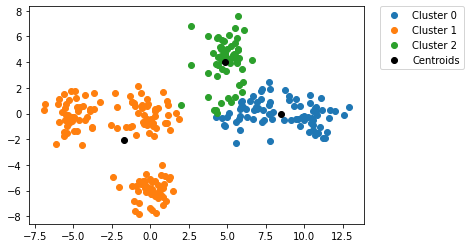

In [6]:
# Initialisation: random
# init_centers is the datapoint indices that are the centroids of each cluster
# m is a k-by-p array represeting the initial centroids
init_centers1 =  np.random.randint(n, size=K)
m1 = x[init_centers1]


# K-Means clustering using Lloyds algorithm:
#   C is the cluster list where C[k] is the list of datapoints in cluster k
#   m is the final centroids
#   conv_iter is the number of iterations until convergence was reached
#   info returns if the algorithm converged succesfully 
C1, m1, conv_iter1, info = kmeans_Lloyd(x, K, m1, N_iter)


# Plot this initial solution (each cluster as a different colour)
# Plot this initial solution here (have each cluster as a different colour)
for i,Ci in enumerate(C1):
    x0 = x[Ci,0].flatten()
    x2 = x[Ci,1].flatten()
    clabel = 'Cluster ' + str(i)
    plt.plot(x0, x2, 'o', label=clabel)
plt.plot(m1[:,0], m1[:,1], 'ko', label='Centroids')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

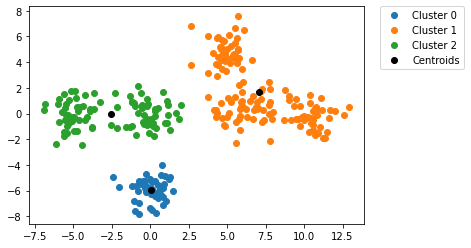

In [7]:
# Initialisation: K-Means++   
init_centers2, m2 = kmpp_init(x, K)

# K-Means clustering using Lloyds algorithm
C2, m2, conv_iter2, info = kmeans_Lloyd(x, K, m2, N_iter)
for i,Ci in enumerate(C2):
    x0 = x[Ci,0].flatten()
    x2 = x[Ci,1].flatten()
    clabel = 'Cluster ' + str(i)
    plt.plot(x0, x2, 'o', label=clabel)
plt.plot(m2[:,0], m2[:,1], 'ko', label='Centroids')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [36]:
# Write functions to compute the WCSS and purity of the solution. Then vary K to see how the solution improves.

# Compare random and K-Means++ initialization methods


def cal_e_kmean(C,x,m):
  e_kmean = 0
  for i,Ci in enumerate(C):
    for x0, x2 in x[Ci,:]:
      e_kmean += np.sum(np.square(x0-m[i,0]) + np.square(x2-m[i,1])) 
      
  return e_kmean


print("C1 e-kmean : "+str(cal_e_kmean(C1, x, m1)))
print("C2 e-kmean : "+str(cal_e_kmean(C2, x, m2)))

    

C1 e-kmean : 2786.6778951331344
C2 e-kmean : 2489.617962132199


## Semi-Supervised Learning

In [9]:
# Generate some constraints to test your algorithm
def generate_constraints(nlabelled, x, x_labs):
    '''
    This function randomly selects some datapoints to be labelled and builds 
    the must-link and cannot-link constrain lists.
    
    INPUT:
        - nlabelled : number of datapoints to consider having labels
        - x : 2d array where rows are observations and columns are attributes.
        - x_labs : array with the corresponding labels for x
        
    OUTPUT
        - ML : An array of arrays containing any must-link constraints for each data point
        - CL : An array of arrays containing any cannot-link constraints for each data point
        - n_MLconstr : number of must-link constraints
        - n_CLconstr : number of cannot-link constraints

    '''
    # we will generate two lists which hold the constraints for each datapoint
    ML = np.empty(shape=(len(x),), dtype=list)
    CL = np.empty(shape=(len(x),), dtype=list)

    # for experimenting we will use only a small subset of the labels
    labelled_idxs = np.random.choice(n, nlabelled, replace=False)

    n_MLconstr = n_CLconstr = 0
    
    # loop over all the datapoints with their labels
    for i in labelled_idxs:
        xi = x[i]
        li = x_labs[i]
    
        # temporary list to hold the constraints of i
        MLi = []
        CLi = []
    
        # now consider all possible constraints
        for j in labelled_idxs:
            if i != j:
                xj = x[j]
                lj = x_labs[j]
                # if the labels are the same store as a must-link otherwise cannot-link
                if li==lj:
                    MLi.append(j)
                else:
                    CLi.append(j)

        ML[i] = MLi
        CL[i] = CLi
        n_MLconstr += len(MLi)
        n_CLconstr += len(CLi)

        
    return ML, CL, n_MLconstr, n_CLconstr


In [10]:
# Use the function to create the list of constraints
nlabelled = 10
ML, CL, n_MLconstr, n_CLconstr = generate_constraints(nlabelled, x, x_labs)

In [38]:

# Implement the Pairwise Constrainted K-Means algorithm
def PCKMeans(x, k, m, ML, CL, N_iter, delta=1e-6,):
    import numpy as np
    from scipy.spatial.distance import cdist, pdist
    
    # use the pdist function to find the max distance between any two points
    F2 = np.max(pdist(x))**2
    
    [ndata, ndim] = x.shape
    clusters = []
    fault = 2
    
    # Since the constraintes depend on whether a pair of data points
    # are in the same cluster we must first generate an initial
    # cluster list based off the distance between the data points
    # and the centroids
    
    # compute the distance from each x to every cluster
    dist = cdist(x, m)
    
    # Assign data points to initial clusters
    x_cluster = dist.argmin(axis=1)
    
    # An array to store the cost (error) for putting a datapoint in each cluster
    cost = np.zeros(k)
    
    for n in range(N_iter):
        idxs = np.random.permutation(ndata)
        for i in idxs:
            xi = x[i]

            # TODO: compute the initial clustering cost          
            for x0, x2 in x[Ci,:]:
              cost[n] += np.sum(np.square(x0-m[i,0]) + np.square(x2-m[i,1])) 
            
            # If i has some must-link constraints
            if ML[i] is not None:
    
                # loop over all the must-link constraints for sample i
                for j in ML[i]:
                
                    # TODO: Calculate the CL penalty
                    # Now consider adding i to all possible clusters 
                    for kp in range(k):
                        # if putting i in cluster kp means it is in a different
                        # cluster to j then add the penalty
                        cost[kp] += 0.0
                        
            # If i has some cannot-link constraints
            if CL[i] is not None:
                
                # now loop over all the cannot-link constraints for i
                for j in CL[i]:
                
                    # TODO: calculate CL penalty
                    # Consider putting i in all possible clusters
                    for kp in range(k):
                        # if putting i in cluster kp means it is in the same cluster
                        # as j then add the penalty
                        cost[kp] +=  
                

            # TODO: now all the costs have been computed select the cluster with the lowest cost value
            x_cluster[i] = 

        # lists for the clusters idxs
        clusters = []
        
        # TODO: Calculate the new centroids
        new_m = 
        
            
        # compute the change in the centroids
        dm = (new_m - m)/m
        m = np.copy(new_m)

        # if the maximum change in the centroids is small enough then converged
        # Should be zero ideally
        if np.max(np.linalg.norm(dm, axis=1)) <= delta:
            fault = 0
            break
            
    return clusters, m, n, fault

IndentationError: ignored